In [8]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
import streamlit as st



In [18]:
df=pd.read_csv('height-weight.csv')

In [19]:
df.head()


,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Weight')

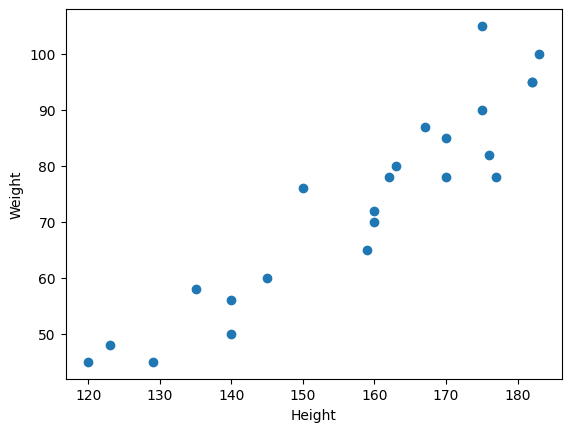

In [20]:
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')

In [21]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [22]:
X=df[['Weight']] # creating independent variable as a dataframe instead of series as it will cause errors.
y=df['Height']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [24]:
# standardisation so that weight (kgs)and height(cms) can be balanced
from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train) # fit= calcuate the mean and std deviatin,then transform -do standardisation
X_test=scaler.transform(X_test) # only transform means take the mean and std from the above traiining data and perform standardistion.


In [26]:
# apply linear regression
from sklearn.linear_model import LinearRegression

In [27]:
regression=LinearRegression(n_jobs=-1)


In [28]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [29]:
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
# regression.coef_
regression.intercept_

np.float64(156.47058823529412)

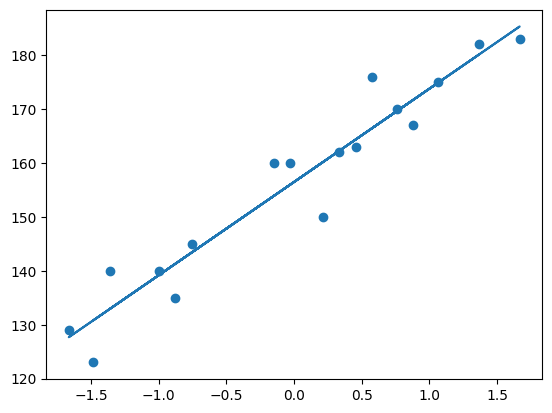

In [30]:
## plot the best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

### prediction of test data
1.predicted height output= intercept +coef_(Weights)
2.y_pred_test =156.47 + 17.29(X_test)

In [31]:
#prediction
y_predict=regression.predict(X_test)


In [32]:
# performance matrices mse,mae, rmse 
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [33]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predict)
print(score)

0.7360826717981276


In [34]:
# display adjusted r square
1 - (1 - score) * (len(y_test)- 1) / (len(y_test)- X_test.shape[1] - 1)


0.6701033397476595

In [35]:
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [36]:
prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [37]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 22 Aug 2024   Prob (F-statistic):                       0.664
Time:                        15:06:57   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\mishr\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [38]:
#  prediction for new data
regression.predict(scaler.transform([[72]]))

C:\Users\mishr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])